In [47]:
from numpy import *
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Função principal, onde serão definidos os passos a seguir

Pega o conjunto de dados e analisa

710.693685281386
1456.3350965744962
1946.1786765790723
2394.3408235695506
2625.156936734124
3322.061552784899
3626.0514682736953
4276.703677207473
5637.177002965462
7210.577186144827
8393.681302791256
10115.764770279184
12139.10684771108
14351.830369731919
16680.141681382476
19933.04750699792
22584.3622681148
26346.543288944235
29662.22865162597
34361.84035736833
38497.73547078538
43253.080343301575
48820.424738091286
53985.31849899025
59776.24470726105
65518.128374733875
70772.35658989825
76756.15579793125
81957.27573425039
88399.03491138059
Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
163.45843912912125
329.3276224015542
379.6803781275743
410.8138297322306
411.71848426364573
504.7668084114881
504.78341056994367
563.2717340607478
904.4426772242814
1330.5884717087117
1550.2152027236602
2006.8006269784555
2594.4951970347365
3257.391409842303
3954.673096738159
5150.3621208141885
5961.571768748463
7388.43034536847
8504.666525227445
10425.576295683559
11

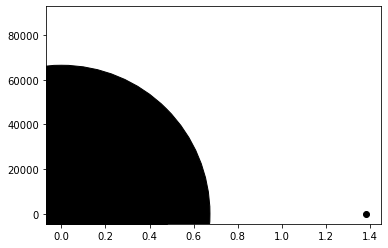

In [48]:


# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
        print(totalError)
    plt.scatter(b, m, color="black")
    plt.plot(b, m, color="blue", linewidth=3)
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 10
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    print("RMSE: ", mean_square_error(b, m))
if __name__ == '__main__':
    run()

Mean squared error

sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)